In [94]:
import numpy as np
import matplotlib.pyplot as plt

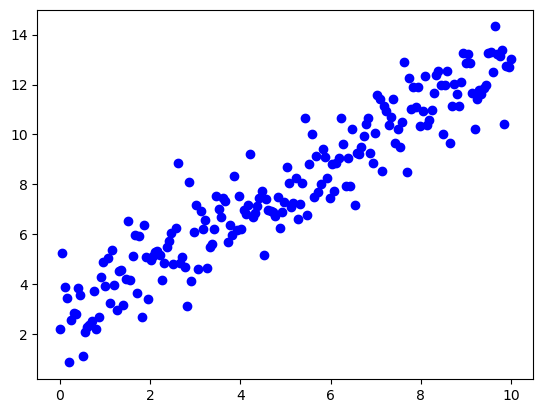

In [95]:
# y = 1*x + 3
# y = a*x + b
# 0 < x < 10
a = 1
b = 3
lx = np.linspace(0, 10, 200)
ly = a*lx + b
ruido = np.random.randn(200)
ly = ly + ruido

plt.scatter(lx, ly, color="b")



In [96]:
a = 10
b = 9


In [97]:
def predice(x):
  y_hat = a*x + b
  return y_hat

# se pasan las x y las y reales y devulve el array de errores de cada x
def error(x, y):
  y_hat = predice(x)
  err = y_hat - y
  return err

# se le pasan las x y las y reales y devuelve el coste cuadrático medio
# 1/(2n) * ∑(yi_hat - yi)²
def coste(x, y):
  err = error(x, y)
  c = err**2
  c = c.mean()
  c = c/2
  return c

#1/n ∑(yi_hat -yi)*xi
def deriva_coste_respecto_a(x, y):
  err = error(x,y)
  d = err*x
  d = d.mean()
  return d

#1/n ∑(yi_hat -yi)=err
def deriva_coste_respecto_b(x, y):
  d = error(x,y)
  d = d.mean()
  return d





pru_x  [0.50251256 2.51256281 5.02512563]
pru_y  [1.09476651 4.79451009 8.68243544]
estimados por el modelo  [14.02512563 34.12562814 59.25125628]
error  [12.93035912 29.33111805 50.56882084]
coste  597.4523857001371


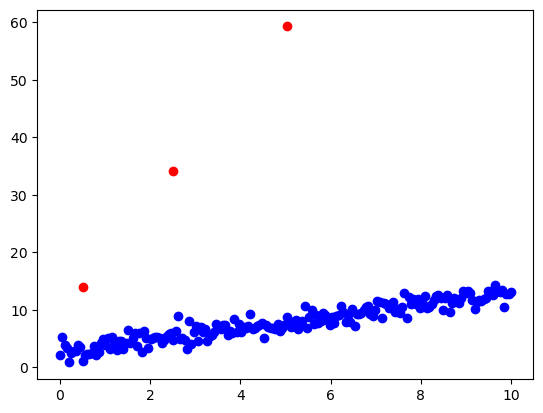

In [98]:
plt.scatter(lx, ly, color="b")
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])

y_hat = predice(pru_x)
plt.scatter(pru_x, y_hat, color="r")
le = error(pru_x, pru_y )
c = coste(pru_x, pru_y)
print("pru_x ", pru_x)
print("pru_y ", pru_y)
print("estimados por el modelo ", y_hat)
print("error ", le)
print("coste ", c)


In [102]:
#pru_x = np.array([lx[10], lx[50], lx[100]])
#pru_y = np.array([ly[10], ly[50], ly[100]])
pru_x = lx
pru_y = ly
lr = 0.01
a = 10
b = 9

In [122]:
def fit(x_train, y_train, batch_size=None, lr = 0.01, epochs=100):
  global a, b
  la = []
  lb = []
  lloss = []
  if batch_size is None: batch_size = len(x_train)
  nbatchs = len(x_train)//batch_size

  for _ in range(epochs):
    for lote in range(nbatchs):
      sl1 = lote*batch_size
      sl2 = sl1 + batch_size
      x_t = x_train[sl1:sl2]
      y_t = y_train[sl1:sl2]
      da = deriva_coste_respecto_a(x_t, y_t)
      db = deriva_coste_respecto_b(x_t, y_t)
      a = a - lr*da
      b = b - lr*db
      loss = coste(x_t, y_t)
      la.append(a); lb.append(b); lloss.append(loss)
      #print(f"a: {a}  b: {b} loss: {loss}")
  return lloss, la, lb

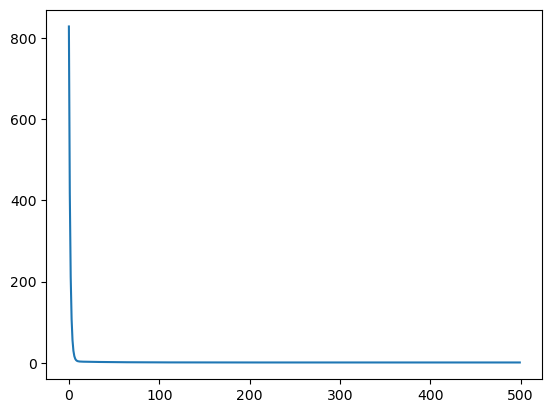

In [179]:
a = 10
b = 9
lloss, la, lb = fit(lx, ly, lr=0.05, epochs=500,batch_size=None)
plt.plot(range(len(lloss)), lloss)

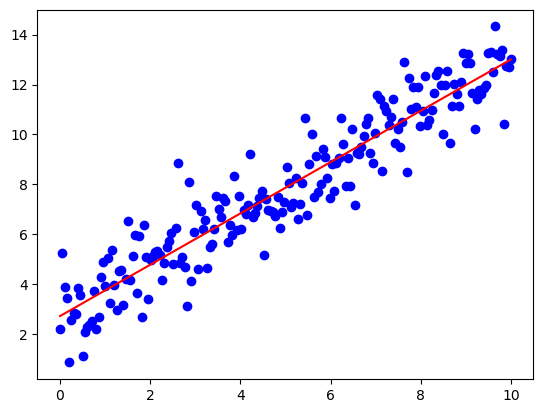

In [180]:
plt.scatter(lx, ly, color="b")
xpru = np.array([0, 10])
ypru = predice(xpru)
plt.plot(xpru, ypru, color="r")

In [181]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')


def drawframe(n):
    global line
    if(n < len(la)):
      a1 = la[n]
      b1 = lb[n]
      x1 = [0, 10]
      y1 = [b1, 10*a1 + b1]
      line.set_data(x1, y1)
    #ax.set_title(f'epoch = {n/len(x):4d}'.format(n))
    return (line,)  #OJO!!! hay que retornar una tupla!!!!

global line
def dibuja_evolucion():
  global line
  fig = plt.figure()
  ax = plt.axes()
  line,  = ax.plot([0, 10], [b, 10*a + b], color="y")
  ax.scatter(lx, ly)
  # blit=True re-draws only the parts that have changed.
  anim = animation.FuncAnimation(fig, drawframe, frames=len(la)-1, interval=5, blit=False, repeat=False)
  return anim

RuntimeError: Requested MovieWriter (ffmpeg) not available

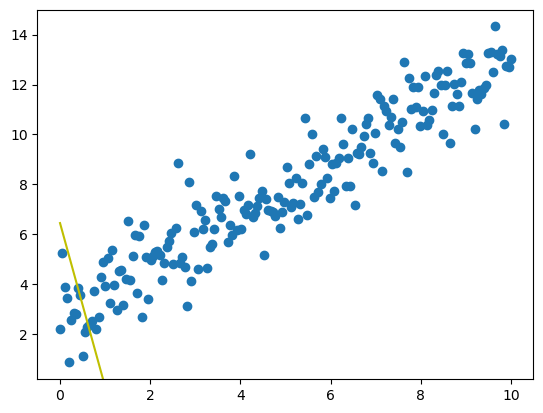

In [182]:
anim = dibuja_evolucion()
anim